# Named entity recognition

In [1]:
from datasets import load_dataset
import pandas as pd
import spacy
from collections import defaultdict, Counter
import matplotlib.pyplot as plt

c:\Users\katar\miniconda3\envs\morfeusz\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Take 1 thousand random passages from the FIQA-PL corpus.

In [2]:
corpus = load_dataset("clarin-knext/fiqa-pl", "corpus")['corpus'].to_pandas()
samples = corpus.sample(n=1000)

### Use the lemmatized and sentence split documents (using SpaCy API for lemmatization and sentence splitting) to identify the expressions that consist of consecutive words starting with a capital letter (you will have to look at the inflected form of the word to check its capitalization) that do not occupy the first position in a sentence.

In [3]:
nlp = spacy.load("pl_core_news_sm")
def count_capitalized_expressions(text):
    doc = nlp(text)
    freq_dict = defaultdict(int)
    for sentence in doc.sents:
        expression = ''
        for id, word in enumerate(sentence):
            if id == 0:
                continue
            if word.text[0].isupper():
                expression += word.lemma_.capitalize() + " "
                continue
            if expression:
                freq_dict[expression[: -1]] += 1
                expression = ''
    return freq_dict



### Compute the frequency of each identified expression and print 50 results with the largest number of occurrences.

In [21]:
total_freq = defaultdict(int)
for text in samples['text']:
    local_freq = count_capitalized_expressions(text)
    for key, value in local_freq.items():
        total_freq[key] += value

sorted_freq = sorted(total_freq.items(), key=lambda x: x[1], reverse=True)

for expr, freq in sorted_freq[:50]:
    print(f"{expr}: {freq}")

Dolar_amerykański: 313
Twój: 226
Ty: 115
Usa: 100
Ciebie: 53
Ira: 51
Nie: 42
Etf: 39
Irs: 32
To: 31
Stany Zjednoczone: 26
W: 23
Jeśli: 22
Indie: 20
Hsa: 20
Internet: 19
Wielki Brytania: 18
Vanguard: 18
A: 17
Być: 15
Trump: 15
Twoich: 14
Amazon: 13
Jak: 13
Google: 13
K: 13
Czy: 12
Nowy Jork: 12
Ameryka: 12
Kanada: 12
Mcdonald's: 12
Tesla: 12
Japonia: 11
Roth Ira: 11
Izrael: 11
Sec: 10
Tak: 10
Twoją: 10
Roth: 10
Europa: 10
Aca: 10
Mieć: 9
Cd: 9
Paypal: 9
Twojego: 9
Co: 9
Ale: 9
Hft: 9
Fdic: 8
Usd: 8


### Apply the NER from SpaCy to identify the named entities in the same set of documents.

In [ ]:
print(nlp.get_pipe("ner").labels)

('date', 'geogName', 'orgName', 'persName', 'placeName', 'time')


In [ ]:
classes = defaultdict(lambda: [defaultdict(int), 0])

def add_element_to_class(classes, ent_label, ent_lemma):
    classes[ent_label][0][ent_lemma] += 1 
    classes[ent_label][1] += 1  

for document in samples['text']:
    doc = nlp(document)
    for ent in doc.ents:
        add_element_to_class(classes, ent.label_, ent.lemma_)

In [37]:
for label, (lemmas, total_tokens) in classes.items():
    print(f"Class label: {label}")
    print(f"  Tokens frequency: {dict(lemmas)}")
    print(f"  Sum of tokens in class: {total_tokens}")

Class label: placeName
  Tokens frequency: {'Wielki Brytania': 18, 'USA': 100, 'amerykański': 39, 'rosyjski': 1, 'Los Angeles': 2, 'angielski': 5, 'Seattle': 3, 'Indie': 20, 'Portland': 1, 'Korea północny': 1, 'Francja': 6, 'Filipiny': 1, 'Filipinach': 1, 'Tajlandia': 2, 'nowy Jork': 7, 'NY': 1, 'kolekcjonerski': 1, 'szkocki': 2, 'rachunek bieżący': 1, 'mediolanie': 1, 'Nowy Jork': 5, 'Hongkong': 2, 'Hiszpania': 5, 'Kanada': 12, 'Meksyk': 1, 'Japonia': 10, 'Kansas City': 1, 'japoński': 3, 'Stany Zjednoczone': 31, '\u200b\u200bich': 3, 'ajurwedyjski': 1, 'Hyderabada': 1, 'kanadyjski': 5, 'ontario': 2, 'NASDAQ': 1, 'Houston': 1, 'Teksas': 4, 'Vancouver': 2, 'chiński': 5, 'boksersko': 1, 'Niemcy': 7, 'niemiecki': 4, 'Mess With Taxes': 1, 'Chiny': 8, 'Kalifornia': 4, 'San Francisco': 2, 'Rosja': 2, 'Argentyna': 1, 'Norwegia': 3, 'Ustawa': 1, 'włoski': 2, 'Vegas': 1, 'Arkansas](http://www.cato.org': 1, 'Arkansas': 6, 'Dallas': 1, 'Niemiec': 2, 'Włochy': 2, 'Facebook': 3, 'Instagram': 4, 'Ch

### Plot the frequency (histogram) of the identified classes.

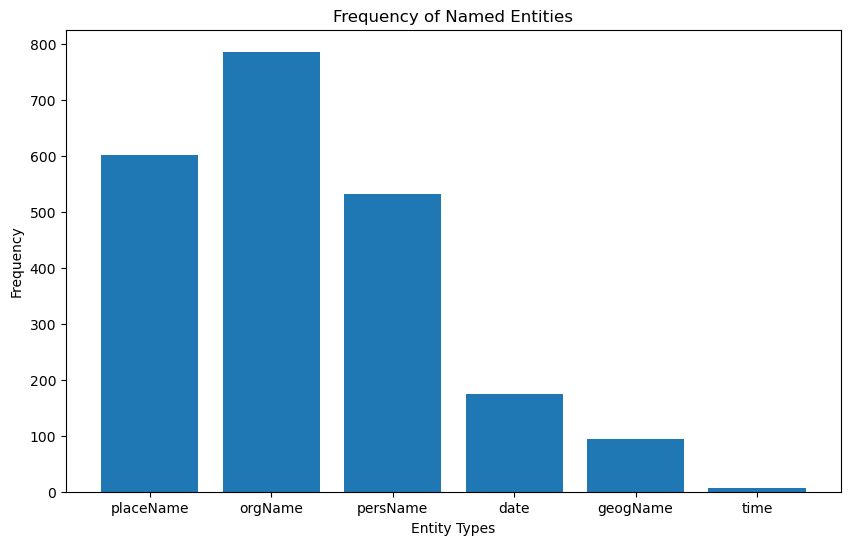

In [40]:
plt.figure(figsize=(10, 6))
plt.bar(classes.keys(), [classes[key][1] for key in classes.keys()])
plt.title("Frequency of Named Entities")
plt.xlabel("Entity Types")
plt.ylabel("Frequency")
plt.show()

### Display 10 most frequent Named Entities for each identified type.

In [41]:
for ent_label, (entities, total_count) in classes.items():
    print(f"Entity Type: {ent_label}")
    most_frequent = Counter(entities).most_common(10)
    for entity, count in most_frequent:
        print(f"  {entity}: {count}")

Entity Type: placeName
  USA: 100
  amerykański: 39
  Stany Zjednoczone: 31
  Indie: 20
  Wielki Brytania: 18
  Kanada: 12
  Izrael: 11
  Japonia: 10
  Ameryka: 9
  Chiny: 8
Entity Type: orgName
  IRA: 54
  ETF: 35
  HSA: 18
  Google: 13
  Roth IRA: 12
  Apple: 10
  ACA: 10
  SEC: 9
  UE: 8
  FDIC: 7
Entity Type: persName
  Vanguard: 16
  Trump: 15
  Amazon: 13
  gdyby być: 6
  Gdybyś: 6
  Hillary: 6
  walmart: 5
  Johnson: 5
  Obama: 5
  Maryland: 5
Entity Type: date
  2009 rok.: 5
  2011 rok.: 4
  2008 rok.: 4
  1040: 4
  XX wiek: 4
  2009 rok: 4
  2007 rok.: 4
  2016 rok.: 3
  2007 rok: 3
  lipiec: 3
Entity Type: geogName
  Europa: 11
  mcDonald's: 4
  europejski: 4
  Airbnb: 3
  Ameryka: 3
  Bliskiego wschód: 2
  Azja: 2
  Pacyfik: 2
  Afryka: 2
  Wall Street: 2
Entity Type: time
  00: 2
  3 nad rano: 1
  godzina 14.: 1
  30: 1
  godzina 14:00: 1
  16.: 1


### Display 50 most frequent Named Entities including their count and type.

In [42]:
all_entities = []
for ent_label, (entities, _) in classes.items():
    for entity, count in entities.items():
        all_entities.append((entity, count, ent_label))

sorted_entities = sorted(all_entities, key=lambda x: x[1], reverse=True)

print(f"{'Entity':<30} {'Count':<10} {'Type'}")
print("-" * 50)
for entity, count, ent_label in sorted_entities[:50]:
    print(f"{entity:<30} {count:<10} {ent_label}")

Entity                         Count      Type
--------------------------------------------------
USA                            100        placeName
IRA                            54         orgName
amerykański                    39         placeName
ETF                            35         orgName
Stany Zjednoczone              31         placeName
Indie                          20         placeName
Wielki Brytania                18         placeName
HSA                            18         orgName
Vanguard                       16         persName
Trump                          15         persName
Google                         13         orgName
Amazon                         13         persName
Kanada                         12         placeName
Roth IRA                       12         orgName
Izrael                         11         placeName
Europa                         11         geogName
Japonia                        10         placeName
Apple                          1

### Display 5 sentences containing at least 2 recognized named entities with different types. Highlight the recognized spans with color.

In [4]:
def find_sentences_with_multiple_entities(documents):
    sentences_with_multiple_entities = []
    for document in documents:
        doc = nlp(document)
        for sentence in doc.sents:
            types = {ent.label_ for ent in sentence.ents}
            if len(types) > 1:
                sentences_with_multiple_entities.append(sentence)
    return sentences_with_multiple_entities


sentences_with_multiple_entities = find_sentences_with_multiple_entities(samples['text'])


In [12]:
from spacy import displacy

options = {
    "ents": ["orgName", "placeName", "geogName", "time", "date", "persName"], 
    "colors": {"orgName": "aqua", "placeName": "lightgreen", "geogName": "blue", "time": "red", "date": "khaki", "persName": "pink"}
}

for sentence in sentences_with_multiple_entities[:5]:
    doc = nlp(sentence.text)
    displacy.render(doc, style="ent", options=options)

### Answer the following questions:

1. Which of the method (counting expressions with capital letters vs. NER) worked better for the task concerned with identification of the proper names?

    Uważam, że NER jest skuteczniejszą, choć nie pozbawioną wad, metodą rozpoznawania nazw własnych w tekstach. Założenie, że każdy wyraz lub ciąg wyrazów pisany wielką literą jest nazwą własną to duże uproszczenie. Wiele wyrazów zapisywanych wielką literą, taich jak Ty, Twój, Ciebie, Pan, Pani nie stanowi nazw własnych i odwrotnie - nazwy własne często są zapisywane małymi literami, zwłaszcza jeśli bierzemy pod uwagę teksty pisane przez użytkowników w internecie, gdzie reguły ortograficzne czy gramatyczne często nie są przestrzegane. 

2. What are the drawbacks of the method based on capital letters?
   
   Metoda oparta o wyszukiwanie nazw własnych na podstawie wielkich liter wyłapuje wayrazy, które są zapisywane wielkąliterą, ale nie są nazwami własnymi (Ty, Twój itp.), a z drugie strony pomija nazwy własne, które nie zostały zapisane wielką literą.

3. What are the drawbacks of the method based on NER?
   
   W metodzie opartej o NER wyrazy lub wyrażenia przypisywane do konkretnych klas często w rzeczywistości do nich nie należą, np. *rachunek bieżący* został zaklasyfikowany jako place name,  wyrazy takie jak *Jakbyś*, *Gdybyś* zostały przyspisane do nazw osób. Poza tym metoda ta nie rozpoznaje synonimów, stąd np. Stany Zjednoczone i USA są traktowane jako odrębne encje.

4. Which of the coarse-grained NER groups has the best and which has the worst results? Try to justify this observation.

   Trudno jest ocenić, w której grupie NER poradził sobie najlepiej. W każdej klasie znajdują się przykłady encji, które zostały błędnie zaklasyfikowane. Wydaje się, że NER poradził sobie całkiem nieźle z rozpoznawaniem dat, chociaż można zauważyć, że w tej klasie występuje problem identyfikacji przypadkowych liczb jako dat, np. 5000 czy 930 prawdopodobnie nie odnoszą się do dat. Uważam, że NER bardzo słabo poradził sobie z rozpoznawaniem nazw osób, ponieważ w tej grupie znalazły się wyrazy zupełnie do niej niepasujące, takie jak *Gdybyś*, *Jakbyś*, *gdyby być*. 

5. Do you think NER is sufficient for identifying different occurrences of the same entity (i.e. consider "USA" and "Stany Zjednoczone" and "Stany Zjednoczone Ameryki Północnej")? If not, can you suggest an algorithm or a tool that would be able to group such names together?

   NER nie jest wystarczający do rozpoznawania tych samych encji występujących pod różnymi nazwami, pnieważ nie ma wystaraczjącej *wiedzy*. Narzędziami, które z pewnością umożliwiają identyfikację takich encji są duże modele językowe, ponieważ są one uczone na tak obszernych zbiorach danych, że sa w stanie brać pod uwagę szerszy kontekst i rozpoznawać synonimy.

6. Can you think of a real world problem that would benefit the most from application of Named Entity Recognition algorithm?
   
   - analiza terndów w mediach społecznościowych - rozpoznawanie najczęściej pojawiających się miejsc i osób w postach

